<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%EA%B7%B8%EB%9E%98%ED%94%84_%EC%A7%84%ED%95%99%EA%B2%B0%EA%B3%BC_%EC%84%B1%EB%B3%84%ED%95%A9%EB%B6%88_RPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 이 코드실행하고 런타임(runtime) 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 라이브러리 부르기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import openpyxl
import csv

##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
df = pd.read_csv('/content/drive/MyDrive/python/dungchon/df_gender.csv', encoding = 'cp949')

# 첫 5줄을 봅니다. 
df.head(4)

In [4]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
df.groupby('성별').count()


***2023학년도 등촌고 합격자수***
고려대 합격자수 - 남자: 0명, 여자: 2명
-----------------------------------------

서강대 합격자수 - 남자: 0명, 여자: 2명
-----------------------------------------

성균관대 합격자수 - 남자: 0명, 여자: 2명
-----------------------------------------

경희대 합격자수 - 남자: 1명, 여자: 0명
-----------------------------------------

한국외대 합격자수 - 남자: 0명, 여자: 2명
-----------------------------------------

서울시립대 합격자수 - 남자: 0명, 여자: 3명
-----------------------------------------

이화여대 합격자수 - 남자: 0명, 여자: 3명
-----------------------------------------

건국대 합격자수 - 남자: 1명, 여자: 0명
-----------------------------------------

동국대 합격자수 - 남자: 1명, 여자: 1명
-----------------------------------------

홍익대 합격자수 - 남자: 1명, 여자: 1명
-----------------------------------------

국민대 합격자수 - 남자: 1명, 여자: 0명
-----------------------------------------

숭실대 합격자수 - 남자: 1명, 여자: 1명
-----------------------------------------



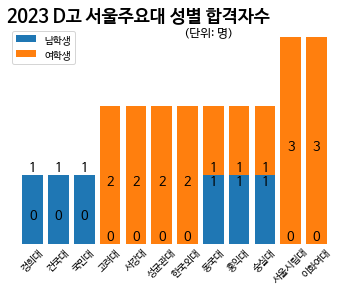

In [35]:
#RPA로 합불자료에서 세로형 누적형 막대 그래프 자동 완성

import pandas as pd
import matplotlib.pyplot as plt

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여자대', '국민대', '숭실대', '세종대', '단국대']

#csv파일 불러오기
df = pd.read_csv("/content/drive/MyDrive/python/dungchon/df_gender.csv", encoding = 'cp949')  # replace with your own file name

print("\n***2023학년도 등촌고 합격자수***")

#빈 리스트
uni_new = []
num_su = []
num_je = []

#리스트에 새로운 대학리스트와, 남자자합격자, 여자자합격자를 담기
for u in uni:
    df_u = df[(df.대학 == u) & (df.최종 == '합')]
    df_u = df_u[['성별', '학번', '대학', '최종']]

    num_su_u = len(df_u[df_u['성별'] == '남자'])
    num_je_u = len(df_u[df_u['성별'] == '여자'])
    
    if (num_su_u > 0) or (num_je_u > 0):
        uni_new.append(u)
        num_su.append(num_su_u)
        num_je.append(num_je_u)

        print(u, "합격자수 - 남자:", str(num_su_u) + "명,", "여자:", str(num_je_u) + "명")
        print("-----------------------------------------\n")


if len(uni_new) > 0:
    # sort the data by the total number of admissions (sum of num_su and num_je)
    data = sorted(zip(uni_new, num_su, num_je), key=lambda x: x[1]+x[2], reverse=False)
    uni_new = [x[0] for x in data]
    num_su = [x[1] for x in data]
    num_je = [x[2] for x in data]


    # plot the bar graph   
    fig, ax = plt.subplots()
    ax.bar(uni_new, num_su, label='남자')
    ax.bar(uni_new, num_je, bottom=num_su, label='여자')
    
    # add value labels
    for i, (su, je) in enumerate(zip(num_su, num_je)):
        ax.text(i, su+0.1, su, ha='center', va='center', fontsize=13)
        #ax.text(i, je+0.02, je, ha='center', va='top', fontsize=13)
        #ax.text(i, su/2, je, ha='center', va='center', fontsize=13)  #예비코드: 남자와 여자합격자가 누적될때 적절한 남자합격자수 위치 
        ax.text(i, (su + je)/2, je, ha='center', va='top', fontsize=13) #예비코드: 남자와 여자합격자가 누적될때 적절한 여자합격자수 위치 

    #범례 
    ax.legend()

    # 그래프 제목
    ax.set_title('2023 D고 서울주요대 성별 합격자수', fontsize=18, fontweight='bold', loc='left')


    # 그래프 부제목
    ax.text(0.6, 1.00, '(단위: 명)', ha='center', va='top', transform=ax.transAxes, fontsize=12)
   
    # X축 눈금(ticks) 제거
    ax.tick_params(axis='x', which='both', length=0)
    
    # 범례 레이블 바꾸기
    ax.legend(['남학생', '여학생'])


    plt.xticks(rotation=45) #x축 45도 회전
    plt.box(False) #테두리 박스 제거
    plt.yticks([]) #y축 제거
    plt.show()
else:
    print("아쉽게도 그래프를 그릴 합격자가 없습니다:().")



***2023학년도 등촌고 합격자수***
고려대 합격자수 - 남자: 0명, 여자: 2명
-----------------------------------------

서강대 합격자수 - 남자: 0명, 여자: 2명
-----------------------------------------

성균관대 합격자수 - 남자: 0명, 여자: 2명
-----------------------------------------

경희대 합격자수 - 남자: 1명, 여자: 0명
-----------------------------------------

한국외대 합격자수 - 남자: 0명, 여자: 2명
-----------------------------------------

서울시립대 합격자수 - 남자: 0명, 여자: 3명
-----------------------------------------

이화여대 합격자수 - 남자: 0명, 여자: 3명
-----------------------------------------

건국대 합격자수 - 남자: 1명, 여자: 0명
-----------------------------------------

동국대 합격자수 - 남자: 1명, 여자: 1명
-----------------------------------------

홍익대 합격자수 - 남자: 1명, 여자: 1명
-----------------------------------------

국민대 합격자수 - 남자: 1명, 여자: 0명
-----------------------------------------

숭실대 합격자수 - 남자: 1명, 여자: 1명
-----------------------------------------



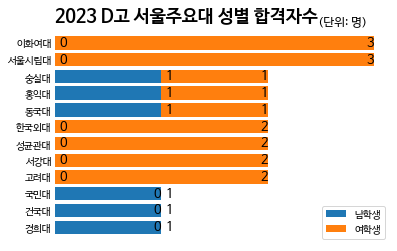

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여자대', '국민대', '숭실대', '세종대', '단국대']

#csv파일 불러오기
df = pd.read_csv("/content/drive/MyDrive/python/dungchon/df_gender.csv", encoding = 'cp949')  # replace with your own file name

print("\n***2023학년도 등촌고 합격자수***")

#빈 리스트
uni_new = []
num_su = []
num_je = []

#리스트에 새로운 대학리스트와, 남자자합격자, 여자자합격자를 담기
for u in uni:
    df_u = df[(df.대학 == u) & (df.최종 == '합')]
    df_u = df_u[['성별', '학번', '대학', '최종']]

    num_su_u = len(df_u[df_u['성별'] == '남자'])
    num_je_u = len(df_u[df_u['성별'] == '여자'])
    
    if (num_su_u > 0) or (num_je_u > 0):
        uni_new.append(u)
        num_su.append(num_su_u)
        num_je.append(num_je_u)

        print(u, "합격자수 - 남자:", str(num_su_u) + "명,", "여자:", str(num_je_u) + "명")
        print("-----------------------------------------\n")


if len(uni_new) > 0:
    # sort the data by the total number of admissions (sum of num_su and num_je)
    data = sorted(zip(uni_new, num_su, num_je), key=lambda x: x[1]+x[2], reverse=False)
    uni_new = [x[0] for x in data]
    num_su = [x[1] for x in data]
    num_je = [x[2] for x in data]


    # plot the horizontal bar graph   
    fig, ax = plt.subplots()
    ax.barh(uni_new, num_su, label='남자')
    ax.barh(uni_new, num_je, left=num_su, label='여자')
    
    # add value labels
    for i, (su, je) in enumerate(zip(num_su, num_je)):
        ax.text(su+0.04, i, su, ha='left', va= 'center', fontsize=13)
        ax.text((su+je), i, je, ha='right', va='center', fontsize=13)

    #범례 
    ax.legend()

     # 범례 레이블 바꾸기
    ax.legend(['남학생', '여학생'])

     # 그래프 제목
    ax.set_title('2023 D고 서울주요대 성별 합격자수', fontsize=18, fontweight='bold', loc='left')


    # 그래프 부제목
    ax.text(0.86, 1.05, '(단위: 명)', ha='center', va='top', transform=ax.transAxes, fontsize=12)

    # remove box and yticks
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='y', which='both', length=0)
    ax.tick_params(axis='x', which='both', length=0)


# Remove x-axis ticks and text
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)




***2023학년도 등촌고 합격자수***
고려대 합격자수 - 남자: 0명, 여자: 2명
-----------------------------------------

서강대 합격자수 - 남자: 0명, 여자: 2명
-----------------------------------------

성균관대 합격자수 - 남자: 0명, 여자: 2명
-----------------------------------------

경희대 합격자수 - 남자: 1명, 여자: 0명
-----------------------------------------

한국외대 합격자수 - 남자: 0명, 여자: 2명
-----------------------------------------

서울시립대 합격자수 - 남자: 0명, 여자: 3명
-----------------------------------------

이화여대 합격자수 - 남자: 0명, 여자: 3명
-----------------------------------------

건국대 합격자수 - 남자: 1명, 여자: 0명
-----------------------------------------

동국대 합격자수 - 남자: 1명, 여자: 1명
-----------------------------------------

홍익대 합격자수 - 남자: 1명, 여자: 1명
-----------------------------------------

국민대 합격자수 - 남자: 1명, 여자: 0명
-----------------------------------------

숭실대 합격자수 - 남자: 1명, 여자: 1명
-----------------------------------------



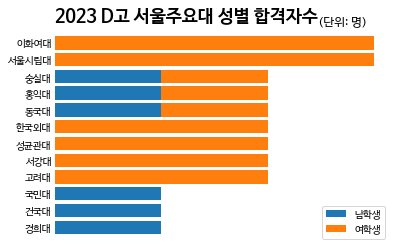

In [86]:
#그래프 숫자를 지운 그래프: 레이블은 ppt에서 삽입~

import pandas as pd
import matplotlib.pyplot as plt

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여자대', '국민대', '숭실대', '세종대', '단국대']

#csv파일 불러오기
df = pd.read_csv("/content/drive/MyDrive/python/dungchon/df_gender.csv", encoding = 'cp949')  # replace with your own file name

print("\n***2023학년도 등촌고 합격자수***")

#빈 리스트
uni_new = []
num_su = []
num_je = []

#리스트에 새로운 대학리스트와, 남자자합격자, 여자자합격자를 담기
for u in uni:
    df_u = df[(df.대학 == u) & (df.최종 == '합')]
    df_u = df_u[['성별', '학번', '대학', '최종']]

    num_su_u = len(df_u[df_u['성별'] == '남자'])
    num_je_u = len(df_u[df_u['성별'] == '여자'])
    
    if (num_su_u > 0) or (num_je_u > 0):
        uni_new.append(u)
        num_su.append(num_su_u)
        num_je.append(num_je_u)

        print(u, "합격자수 - 남자:", str(num_su_u) + "명,", "여자:", str(num_je_u) + "명")
        print("-----------------------------------------\n")


if len(uni_new) > 0:
    # sort the data by the total number of admissions (sum of num_su and num_je)
    data = sorted(zip(uni_new, num_su, num_je), key=lambda x: x[1]+x[2], reverse=False)
    uni_new = [x[0] for x in data]
    num_su = [x[1] for x in data]
    num_je = [x[2] for x in data]


    # plot the horizontal bar graph   
    fig, ax = plt.subplots()
    ax.barh(uni_new, num_su, label='남자')
    ax.barh(uni_new, num_je, left=num_su, label='여자')
    
    # add value labels
    #for i, (su, je) in enumerate(zip(num_su, num_je)):
        #ax.text(su+0.04, i, su, ha='left', va= 'center', fontsize=13)
        #ax.text((su+je), i, je, ha='right', va='center', fontsize=13)

    #범례 
    ax.legend()

     # 범례 레이블 바꾸기
    ax.legend(['남학생', '여학생'])

     # 그래프 제목
    ax.set_title('2023 D고 서울주요대 성별 합격자수', fontsize=18, fontweight='bold', loc='left')


    # 그래프 부제목
    ax.text(0.86, 1.05, '(단위: 명)', ha='center', va='top', transform=ax.transAxes, fontsize=12)

    # remove box and yticks
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='y', which='both', length=0)
    ax.tick_params(axis='x', which='both', length=0)


# Remove x-axis ticks and text
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)



In [ ]:
df_km = df[(df.대학 == '단국대')]

df_km = df[(df.대학 == '단국대') & (df.최종 == '합')]
print(df_km[['대학', '전형분류', '최종']])

Empty DataFrame
Columns: [대학, 전형분류, 최종]
Index: []


In [ ]:
df_km = df[(df.대학 == '숭실대')]
print(df_km[['대학', '전형분류', '최종']])